In [1]:
!nvidia-smi

Mon Mar 10 15:15:22 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**Step 01 # Install the Ultralytics Package**

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.6/922.6 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 37.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

**Step 02 # Import All the Requried Libraries**

In [3]:
from ultralytics import YOLO
from IPython.display import Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**Step # 03 Download Dataset**

In [4]:
import gdown
# download the data from g drive

url = "https://drive.google.com/file/d/1XEM9BQ9LtJWIHh977p3qadqJI0BBlVud/view?usp=sharing"
file_id = url.split("/")[-2]
print(file_id)

prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix+file_id, "images.zip")


1XEM9BQ9LtJWIHh977p3qadqJI0BBlVud


Downloading...
From: https://drive.google.com/uc?/export=download&id=1XEM9BQ9LtJWIHh977p3qadqJI0BBlVud
To: /content/images.zip
100%|██████████| 6.22M/6.22M [00:00<00:00, 137MB/s]


'images.zip'

In [5]:
!unzip images.zip

Archive:  images.zip
   creating: All_images/
  inflating: All_images/data.yaml    
   creating: All_images/test/
   creating: All_images/test/images/
  inflating: All_images/test/images/A986.jpg  
  inflating: All_images/test/images/A990.jpg  
  inflating: All_images/test/images/B993.jpg  
  inflating: All_images/test/images/C95.jpg  
  inflating: All_images/test/images/C991.jpg  
  inflating: All_images/test/images/E963.jpg  
  inflating: All_images/test/images/E964.jpg  
  inflating: All_images/test/images/E973.jpg  
  inflating: All_images/test/images/E99.jpg  
  inflating: All_images/test/images/F983.jpg  
  inflating: All_images/test/images/F984.jpg  
  inflating: All_images/test/images/F994.jpg  
  inflating: All_images/test/images/G980.jpg  
  inflating: All_images/test/images/H955.jpg  
  inflating: All_images/test/images/H96.jpg  
  inflating: All_images/test/images/I980.jpg  
  inflating: All_images/test/images/I99.jpg  
  inflating: All_images/test/images/J99.jpg  
  inflat

**Step # 04 Train YOLO11 Model on a Custom Dataset**

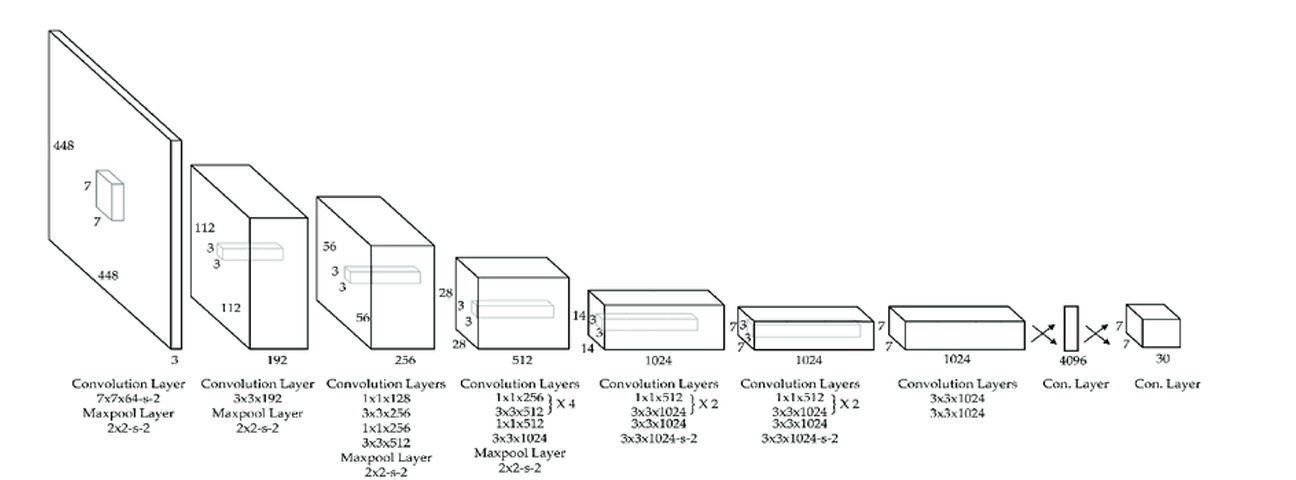

In [11]:
!yolo task=detect mode=train data=/content/All_images/data.yaml model=yolo11n.pt epochs=50 imgsz=640

Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/All_images/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

**Step # 05 Examine Training Results**

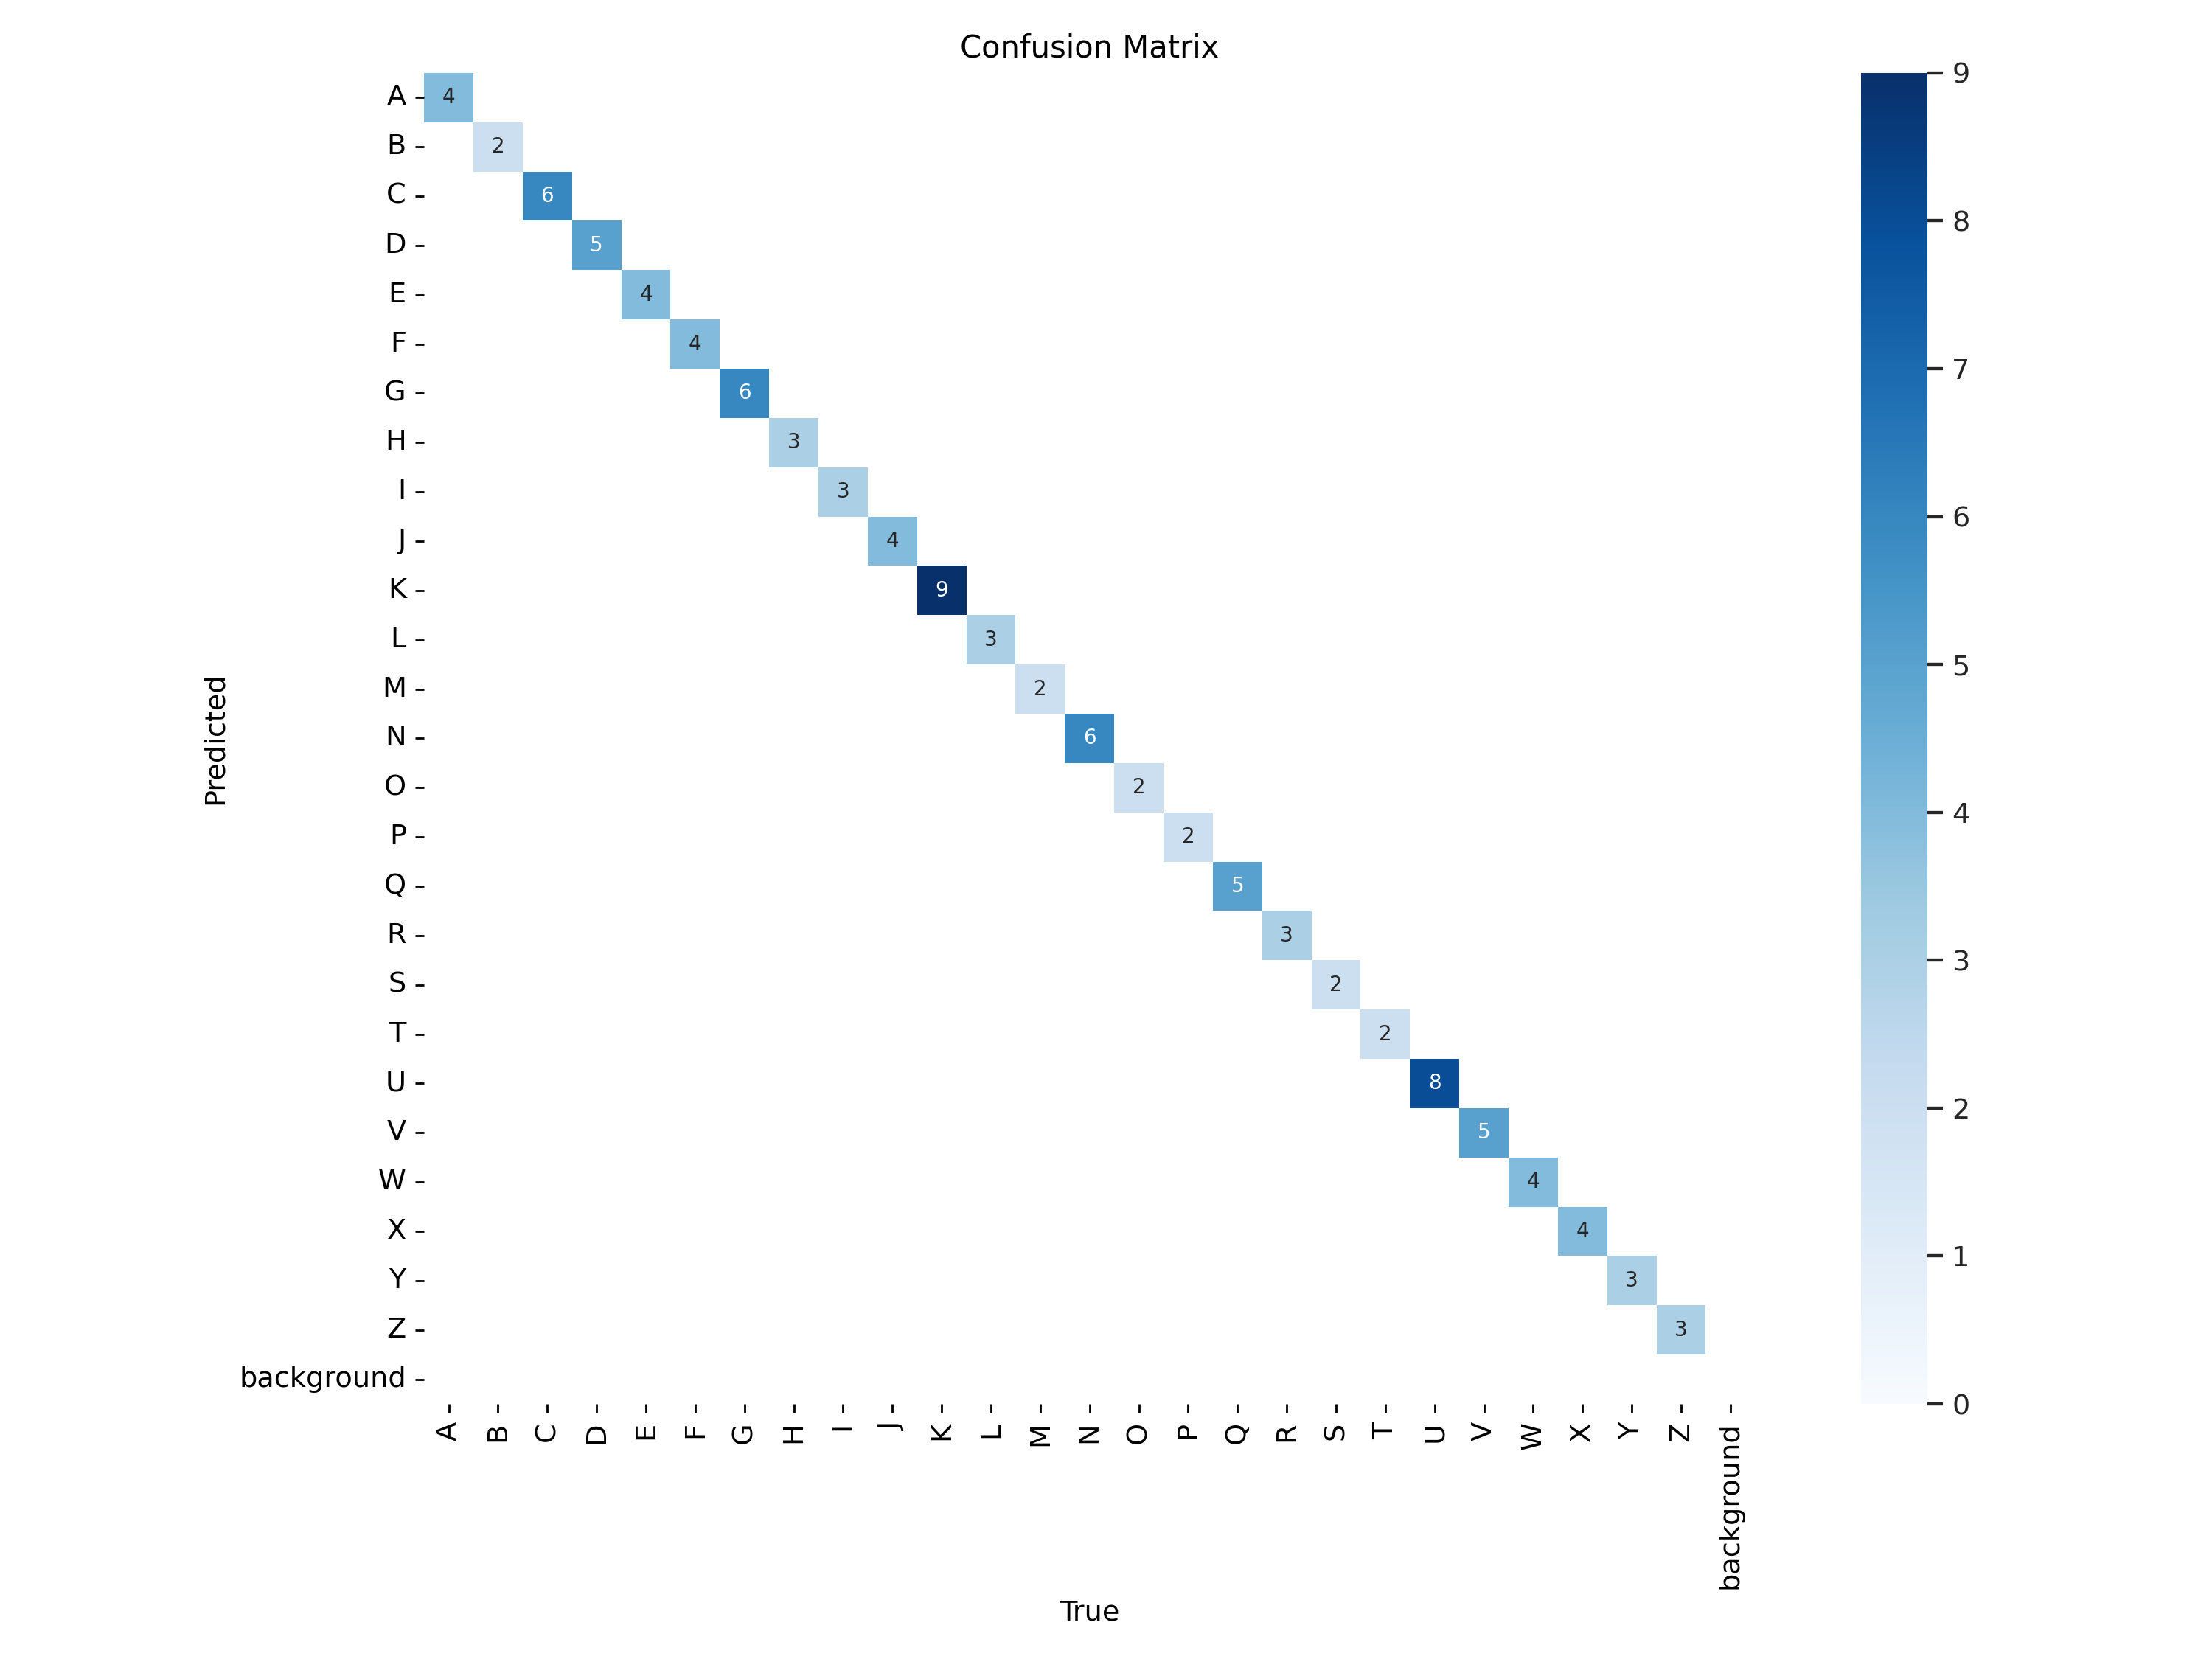

In [12]:
Image("/content/runs/detect/train3/confusion_matrix.png", width=600)

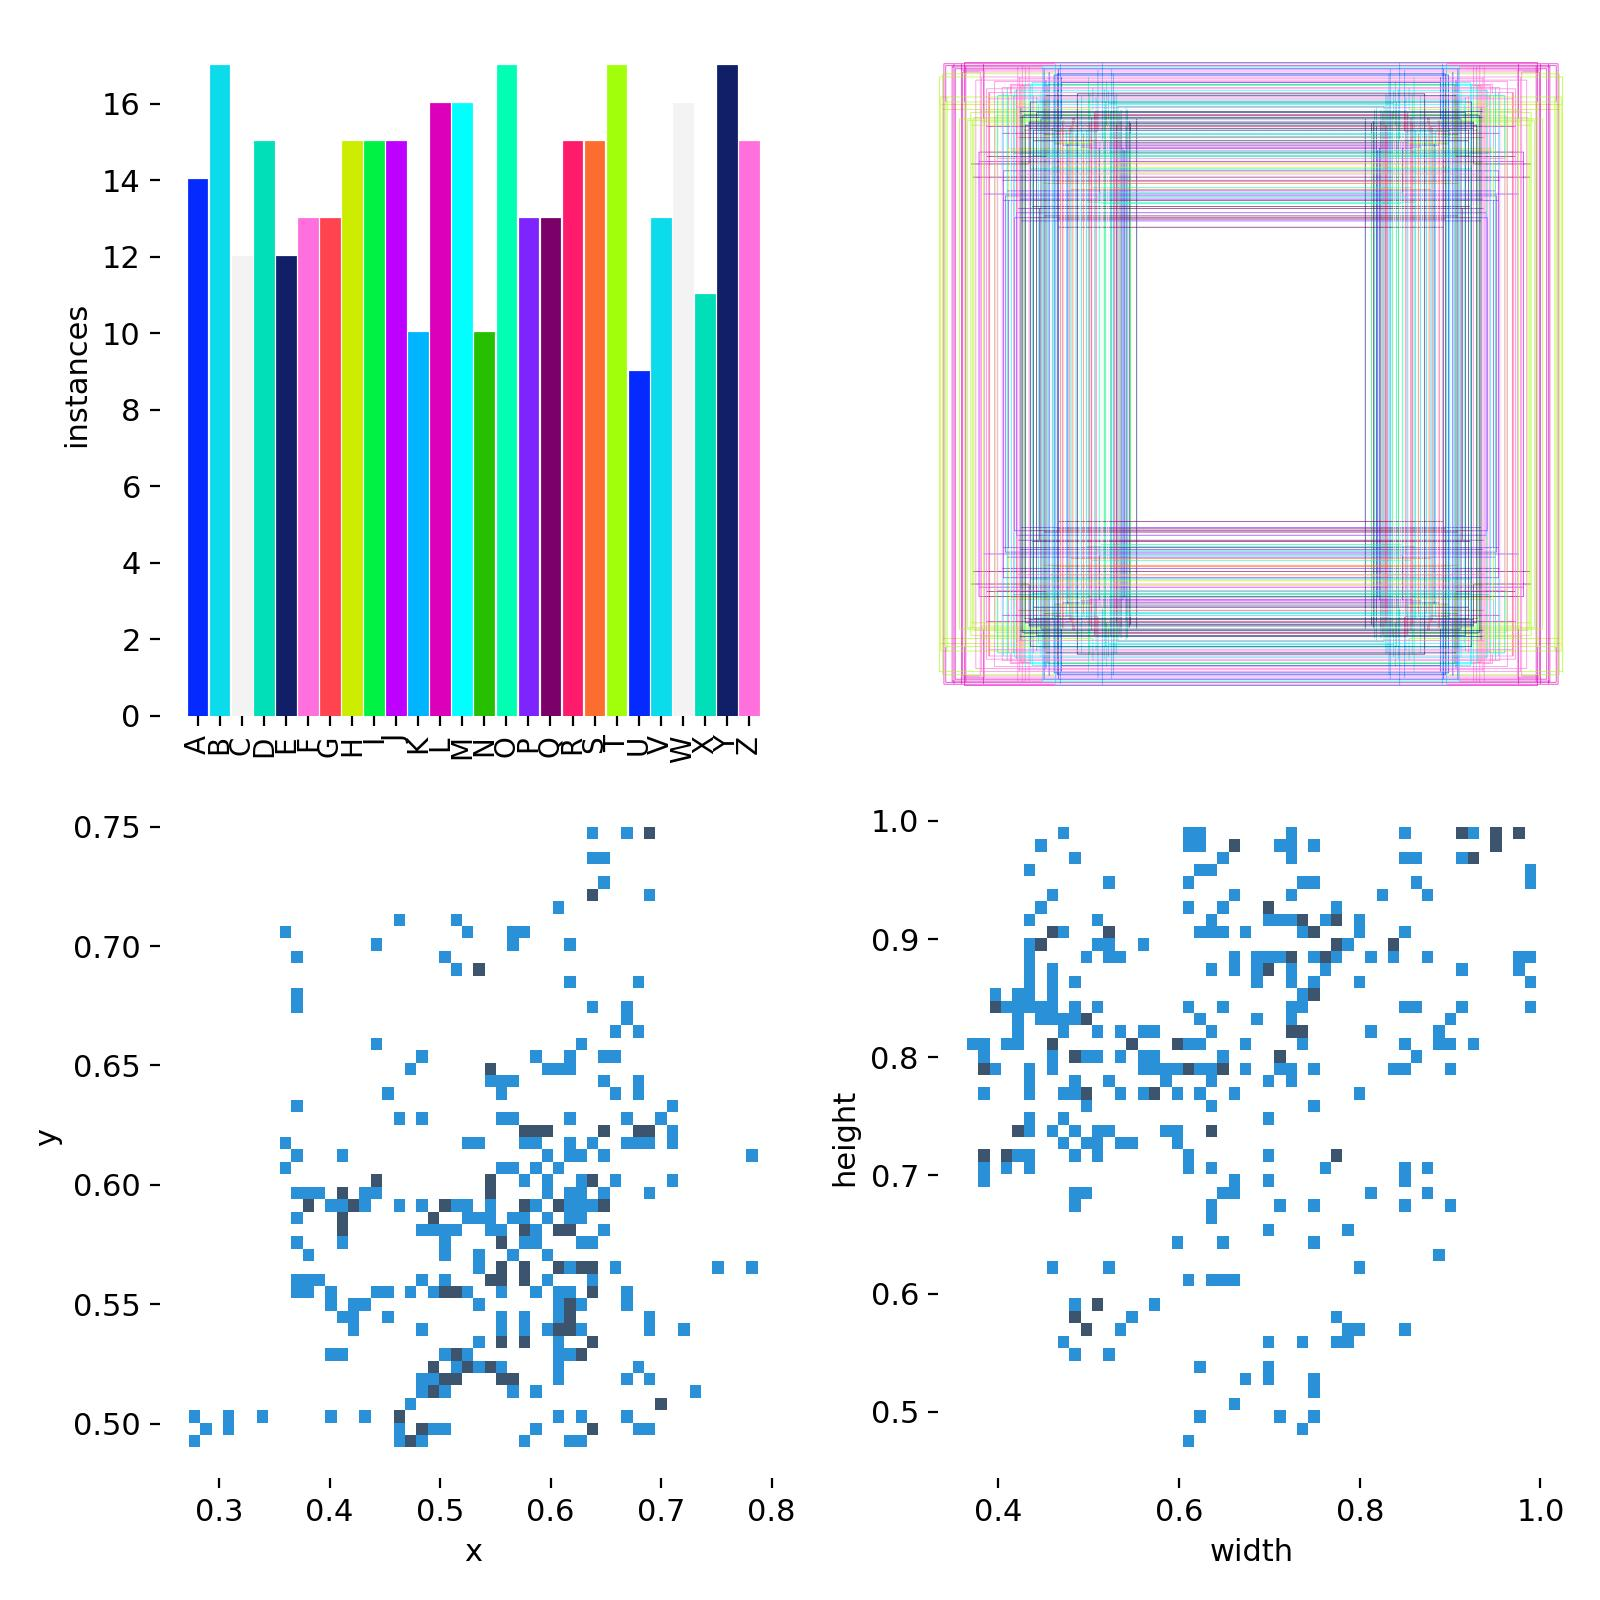

In [13]:
Image("runs/detect/train3/labels.jpg", width=600)

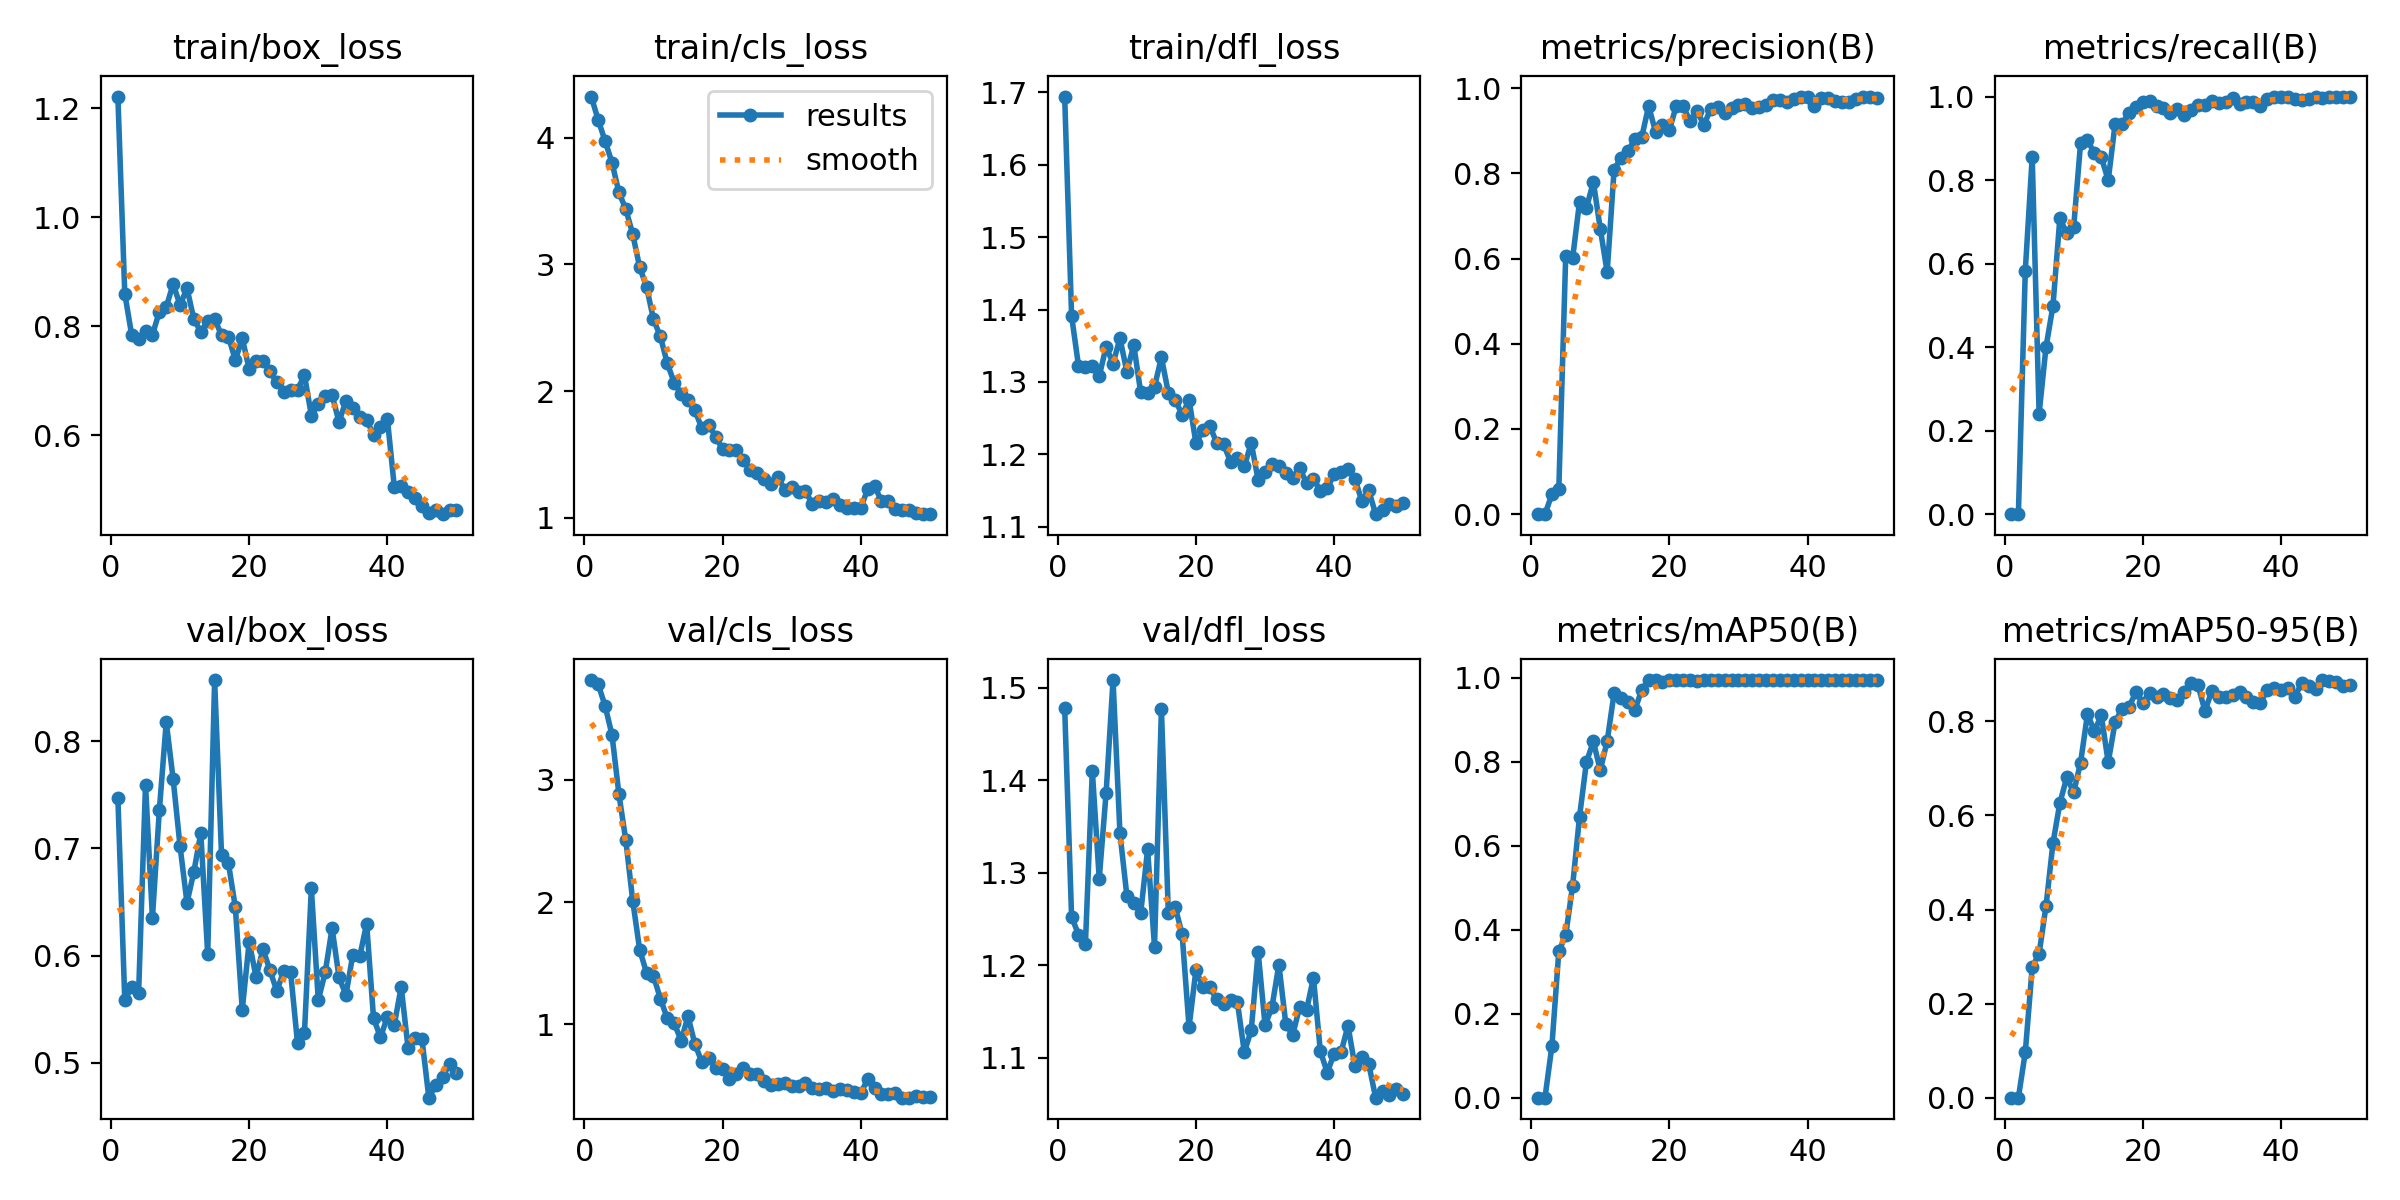

In [14]:
Image("runs/detect/train3/results.png", width=600)

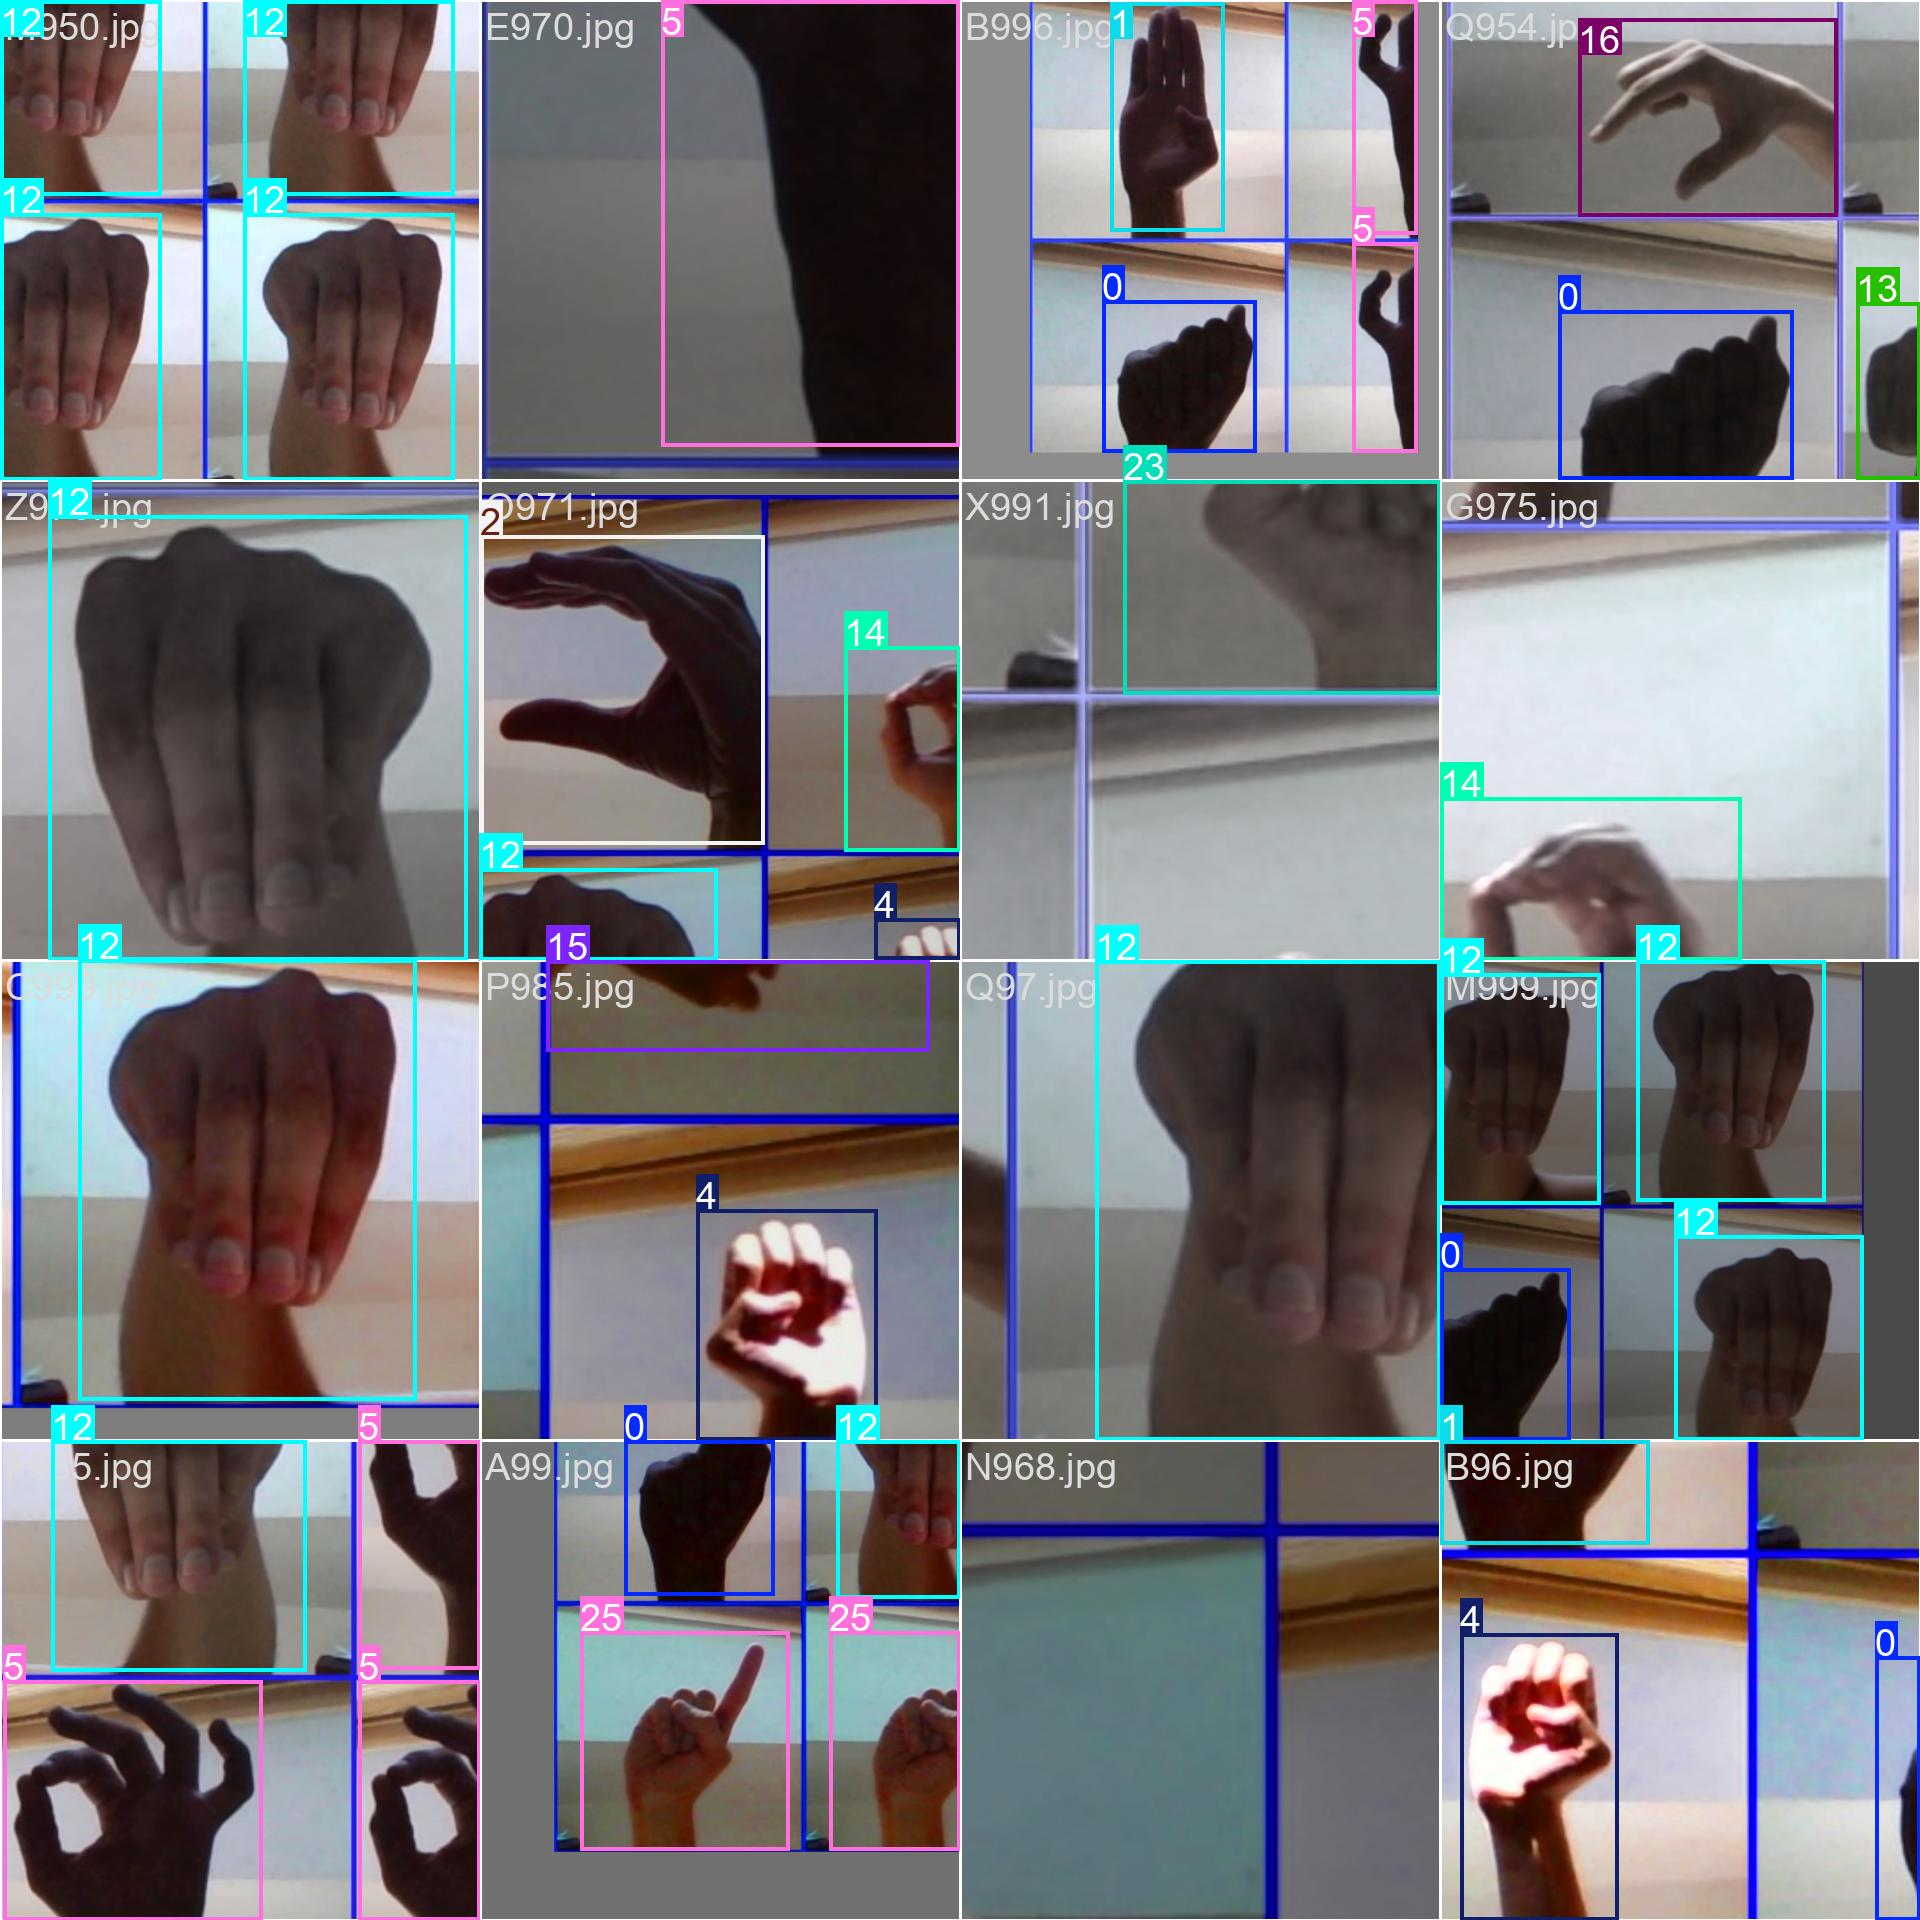

In [15]:
Image("runs/detect/train3/train_batch0.jpg", width=600)

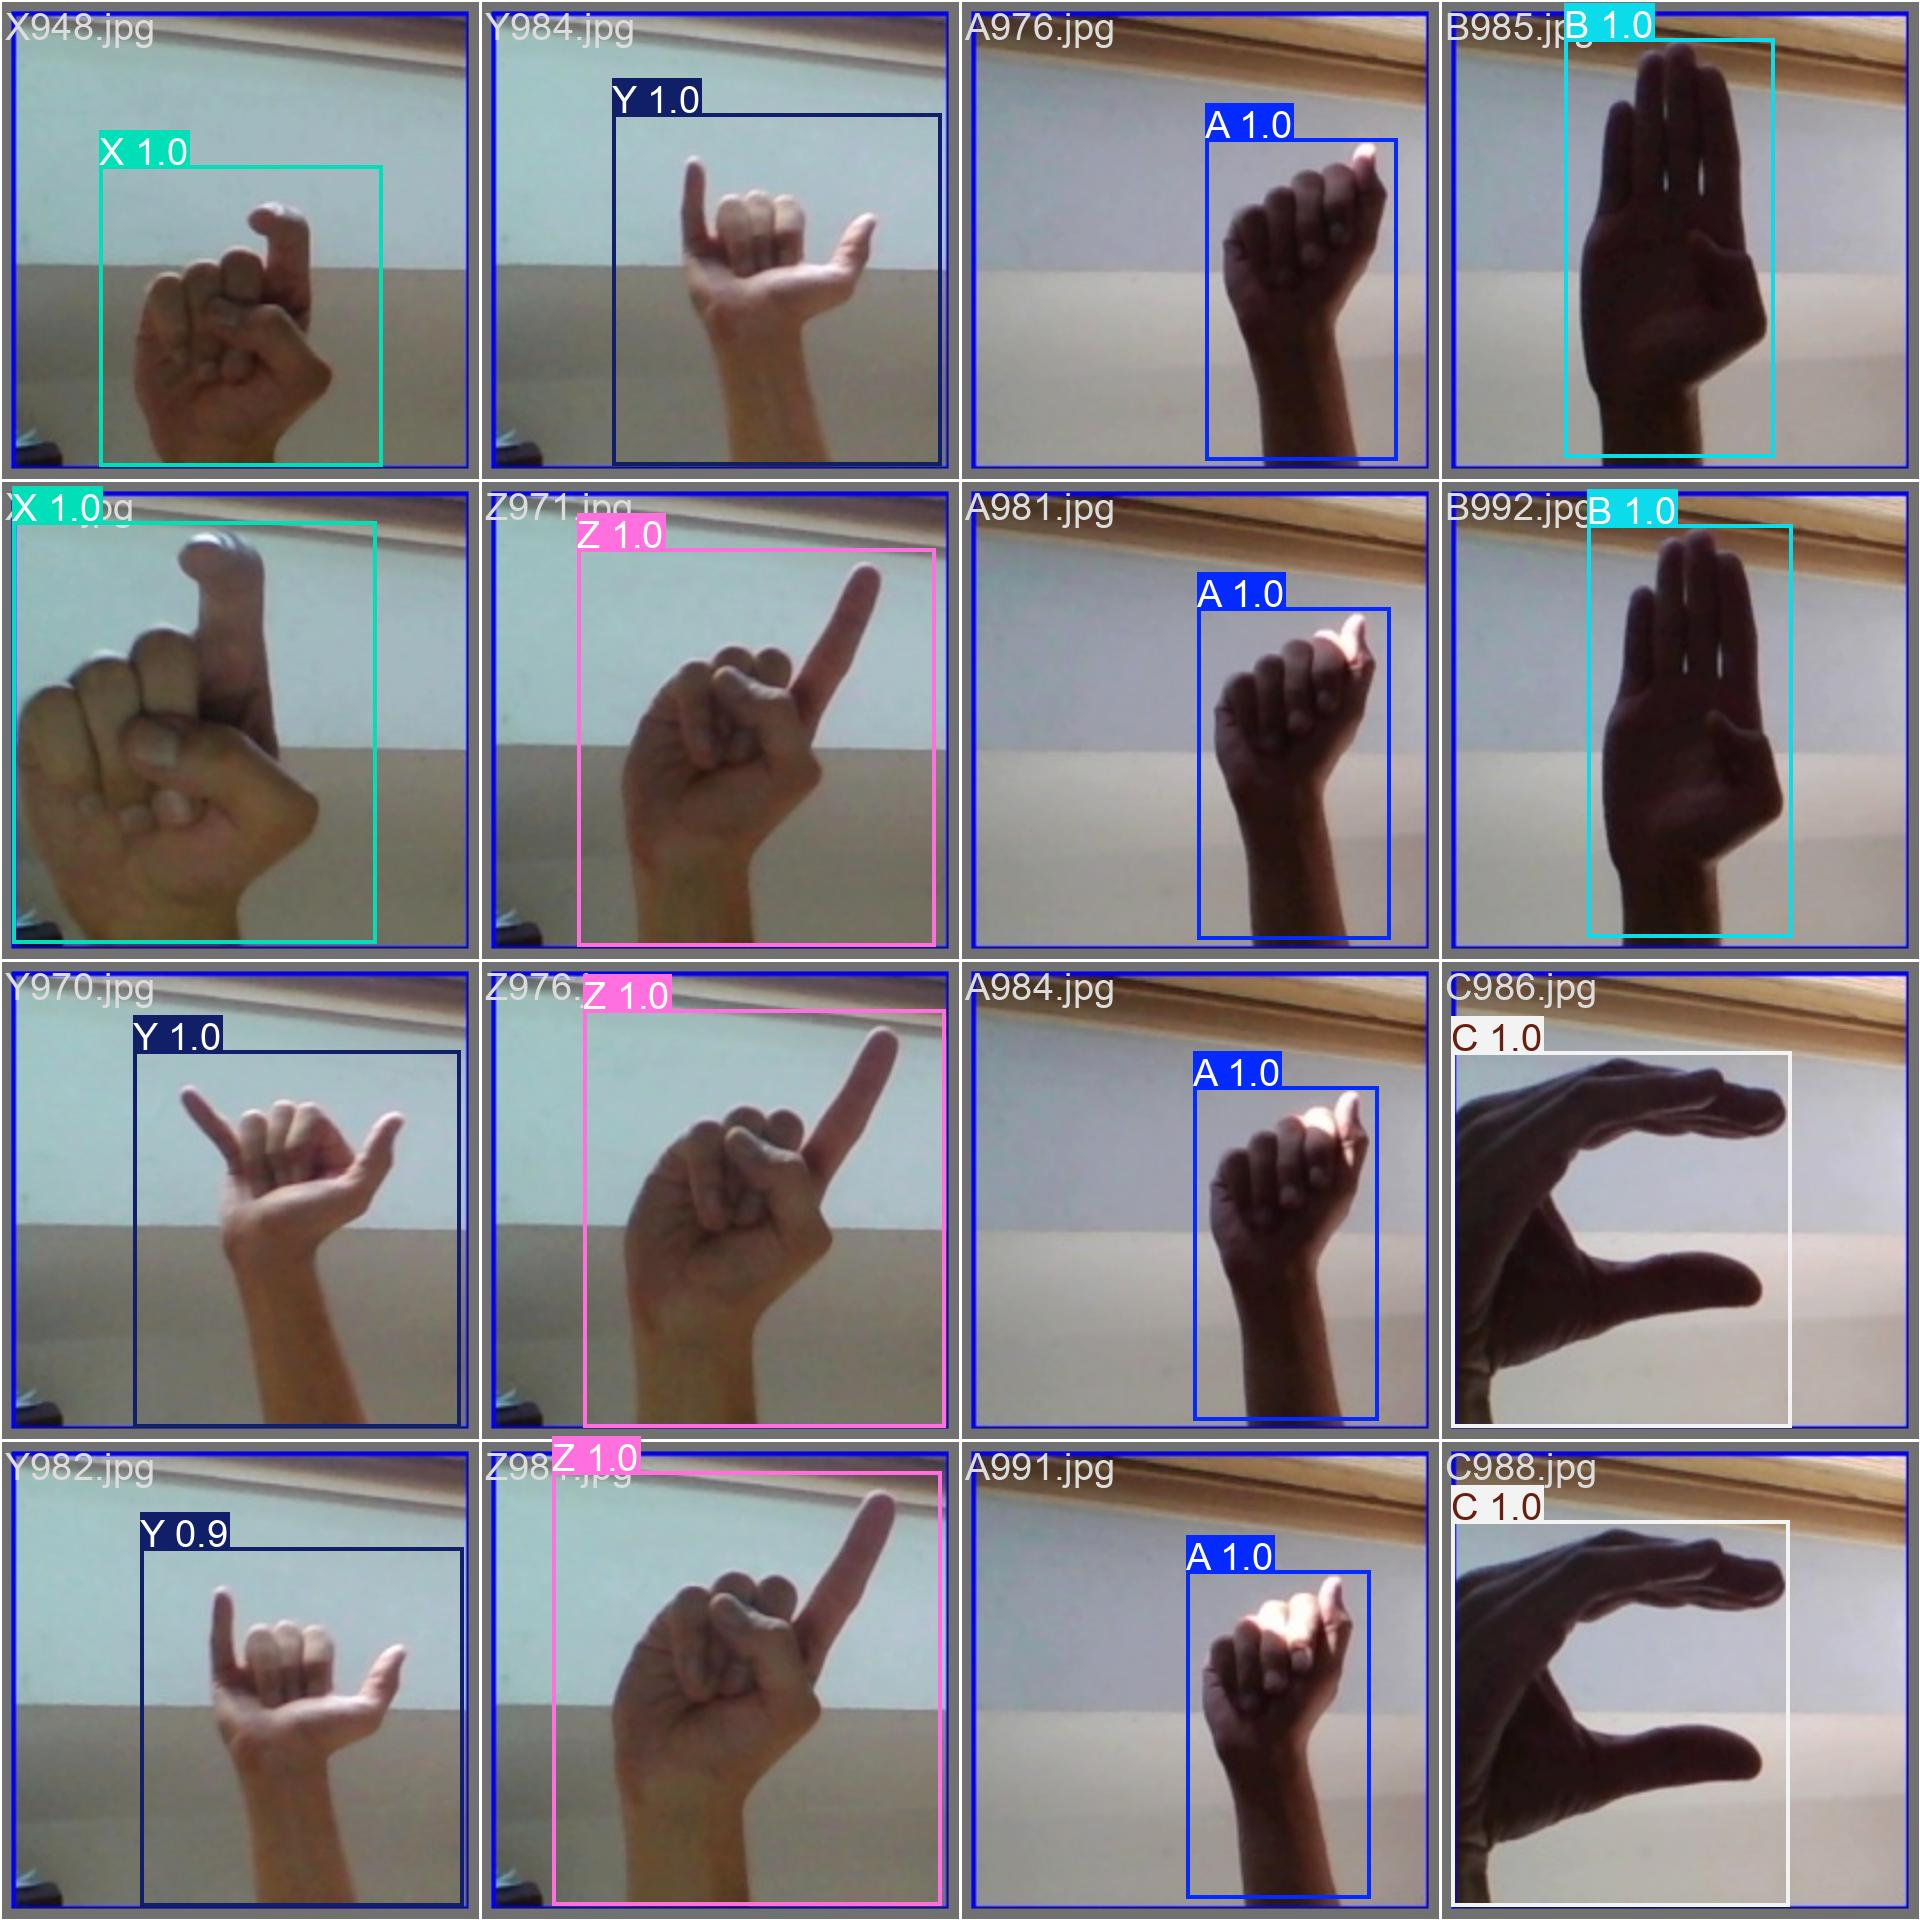

In [16]:
Image("runs/detect/train3/val_batch0_pred.jpg", width=600)

**Step # 08 Inference with Custom Model on Images**

In [18]:
!yolo task=detect mode=predict model="/content/runs/detect/train3/weights/best.pt" conf=0.25 source="/content/All_images/test/images" save=True

Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,587,222 parameters, 0 gradients, 6.3 GFLOPs

image 1/52 /content/All_images/test/images/A986.jpg: 640x640 1 A, 11.1ms
image 2/52 /content/All_images/test/images/A990.jpg: 640x640 1 A, 9.1ms
image 3/52 /content/All_images/test/images/B993.jpg: 640x640 1 B, 8.2ms
image 4/52 /content/All_images/test/images/C95.jpg: 640x640 1 C, 7.9ms
image 5/52 /content/All_images/test/images/C991.jpg: 640x640 1 C, 8.3ms
image 6/52 /content/All_images/test/images/E963.jpg: 640x640 1 E, 8.2ms
image 7/52 /content/All_images/test/images/E964.jpg: 640x640 1 E, 13.8ms
image 8/52 /content/All_images/test/images/E973.jpg: 640x640 1 E, 10.1ms
image 9/52 /content/All_images/test/images/E99.jpg: 640x640 1 E, 7.9ms
image 10/52 /content/All_images/test/images/F983.jpg: 640x640 1 F, 7.9ms
image 11/52 /content/All_images/test/images/F984.jpg: 640x640 1 F, 7.9ms
image 12/52 /content/All_images/test/im

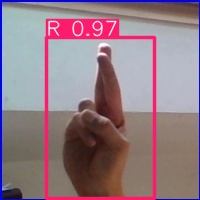

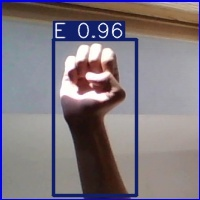

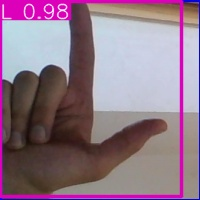

In [19]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [21]:
!yolo task=detect mode=predict model= "runs/detect/train3/weights/best.pt" conf=0.25 source="/content/All_images/train/images/A979.jpg" save=True

Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,587,222 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/All_images/train/images/A979.jpg: 640x640 1 A, 12.2ms
Speed: 4.2ms preprocess, 12.2ms inference, 151.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


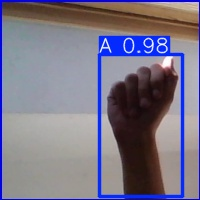

In [22]:
Image("runs/detect/predict2/A979.jpg", width=600)